Import library yang digunakan

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Dataset yang kami gunakan adalah dataset 'Dietary Habits Survey Data' yang berisi data kebiasaan makan dari umur tertentu,
gender laki-laki dan perempuan, serta seberapa sering mereka makan dalam sehari.

In [27]:
# Membaca dataset
dataset = pd.read_csv('Dietary Habits Survey Data.csv')

In [28]:
dataset.head()

,Age,Gender,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),What would best describe your diet:,Choose all that apply: [I skip meals],Choose all that apply: [I experience feelings of hunger during the day],Choose all that apply: [I consult a nutritionist/dietician],Choose all that apply: [I cook my own meals],What would you consider to be the main meal of YOUR day?,What does your diet mostly consist of and how is it prepared?,...,What is your weekly food intake frequency of the following food categories: [Meat],What is your weekly food intake frequency of the following food categories: [Seafood ],How frequently do you consume these beverages [Tea],How frequently do you consume these beverages [Coffee],How frequently do you consume these beverages [Aerated (Soft) Drinks],How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)],"How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]",How frequently do you consume these beverages [Alcoholic Beverages],"What is your water consumption like (in a day, 1 cup=250ml approx)",
0,18-24,Male,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups,NaN
1,18-24,Male,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups,NaN
2,45-54,Male,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups,NaN
3,18-24,Male,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups,NaN
4,18-24,Female,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,...,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups,NaN


Mengubah kolom gender menjadi binary/integer agar memudahkan proses clustering

In [30]:

data = {'ID': [1, 2, 3, 4],
        'Gender': ['Male', 'Female', 'Male', 'Female']}

df = pd.DataFrame(data)

# Mengganti nilai "Male" dengan 0 dan "Female" dengan 1
dataset['Gender'] = dataset['Gender'].replace({'Male': 0, 'Female': 1})

# Menampilkan DataFrame setelah penggantian nilai
print(df)

   ID  Gender
0   1    Male
1   2  Female
2   3    Male
3   4  Female


Menampilkan dataset setelah kolom gender diubah

In [31]:
dataset

,Age,Gender,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),What would best describe your diet:,Choose all that apply: [I skip meals],Choose all that apply: [I experience feelings of hunger during the day],Choose all that apply: [I consult a nutritionist/dietician],Choose all that apply: [I cook my own meals],What would you consider to be the main meal of YOUR day?,What does your diet mostly consist of and how is it prepared?,...,What is your weekly food intake frequency of the following food categories: [Meat],What is your weekly food intake frequency of the following food categories: [Seafood ],How frequently do you consume these beverages [Tea],How frequently do you consume these beverages [Coffee],How frequently do you consume these beverages [Aerated (Soft) Drinks],How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)],"How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]",How frequently do you consume these beverages [Alcoholic Beverages],"What is your water consumption like (in a day, 1 cup=250ml approx)",
0,18-24,0,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Often,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups,NaN
1,18-24,0,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Never,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups,NaN
2,45-54,0,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Never,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups,NaN
3,18-24,0,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Once a day,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups,NaN
4,18-24,1,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,...,Never,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,18-24,0,3,Pollotarian (Vegetarian who consumes poultry a...,Sometimes,Rarely,Never,Never,Lunch,Freshly home-cooked produce,...,Few times a week,Never,Once a day,Never,Once a day,Few times a week,Never,Few times a week,7-10 cups,NaN
74,18-24,0,5,Non-Vegetarian,Never,Sometimes,Never,Never,Breakfast,Freshly home-cooked produce,...,Once a day,Once a month,Never,Few times a week,Never,Few times a week,Few times a week,Few times a week,More than 15 cups,NaN
75,18-24,1,3,Non-Vegetarian,Sometimes,Rarely,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Few times a week,Few times a week,Once a day,Few times a week,Once a month,Few times a week,Few times a week,Never,7-10 cups,NaN
76,18-24,1,3,Pollotarian (Vegetarian who consumes poultry a...,Very frequently,Sometimes,Never,Rarely,Dinner,Restaurant meals,...,Once a month,Never,Never,Once a month,Once a month,Once a month,Few times a week,Few times a week,4-6 cups,NaN


Pilih kolom yang ingin digunakan untuk clustering, disini kami menggunakan kolom 'Gender' dan kolom 
'How many meals do you have a day?'

In [32]:

X = dataset[['Gender', 'How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)']]

In [33]:
# Tentukan jumlah klaster (n_clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

c:\Users\ACER\c2-21\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [34]:
# Tambahkan kolom klaster ke dataset
dataset['Cluster'] = kmeans.labels_

In [35]:
dataset

,Age,Gender,How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten),What would best describe your diet:,Choose all that apply: [I skip meals],Choose all that apply: [I experience feelings of hunger during the day],Choose all that apply: [I consult a nutritionist/dietician],Choose all that apply: [I cook my own meals],What would you consider to be the main meal of YOUR day?,What does your diet mostly consist of and how is it prepared?,...,What is your weekly food intake frequency of the following food categories: [Seafood ],How frequently do you consume these beverages [Tea],How frequently do you consume these beverages [Coffee],How frequently do you consume these beverages [Aerated (Soft) Drinks],How frequently do you consume these beverages [Fruit Juices (Fresh/Packaged)],"How frequently do you consume these beverages [Dairy Beverages (Milk, Milkshakes, Smoothies, Buttermilk, etc)]",How frequently do you consume these beverages [Alcoholic Beverages],"What is your water consumption like (in a day, 1 cup=250ml approx)",,Cluster
0,18-24,0,5,Pollotarian (Vegetarian who consumes poultry a...,Rarely,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Often,Never,Never,Less often,Never,Less often,Never,More than 15 cups,NaN,1
1,18-24,0,4,Vegetarian (No egg or meat),Rarely,Often,Rarely,Rarely,Lunch,Freshly home-cooked produce,...,Never,Less often,Never,Often,Once a day,Often,Never,11-14 cups,NaN,1
2,45-54,0,3,Pescatarian (Vegetarian who consumes only seaf...,Never,Rarely,Never,Never,All,Freshly home-cooked produce,...,Often,Once a day,Less often,Never,Less often,Once a day,Never,More than 15 cups,NaN,0
3,18-24,0,2,Non-Vegetarian,Often,Often,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Few times a week,Few times a week,Once a day,Once a month,Once a month,Few times a week,Never,7-10 cups,NaN,0
4,18-24,1,3,Eggetarian (Vegetarian who consumes egg and eg...,Sometimes,Sometimes,Never,Often,Breakfast,Freshly home-cooked produce,...,Never,Never,Never,Once a month,Once a month,Once a day,Once a month,4-6 cups,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,18-24,0,3,Pollotarian (Vegetarian who consumes poultry a...,Sometimes,Rarely,Never,Never,Lunch,Freshly home-cooked produce,...,Never,Once a day,Never,Once a day,Few times a week,Never,Few times a week,7-10 cups,NaN,0
74,18-24,0,5,Non-Vegetarian,Never,Sometimes,Never,Never,Breakfast,Freshly home-cooked produce,...,Once a month,Never,Few times a week,Never,Few times a week,Few times a week,Few times a week,More than 15 cups,NaN,1
75,18-24,1,3,Non-Vegetarian,Sometimes,Rarely,Never,Sometimes,Lunch,Freshly home-cooked produce,...,Few times a week,Once a day,Few times a week,Once a month,Few times a week,Few times a week,Never,7-10 cups,NaN,0
76,18-24,1,3,Pollotarian (Vegetarian who consumes poultry a...,Very frequently,Sometimes,Never,Rarely,Dinner,Restaurant meals,...,Never,Never,Once a month,Once a month,Once a month,Few times a week,Few times a week,4-6 cups,NaN,0


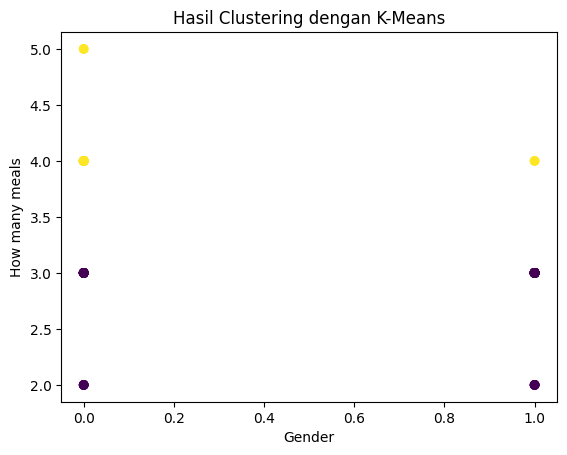

In [36]:
# Visualisasikan hasil clustering
plt.scatter(dataset['Gender'], dataset['How many meals do you have a day? (number of regular occasions in a day when a significant and reasonably filling amount of food is eaten)'], c=dataset['Cluster'], cmap='viridis')
plt.title('Hasil Clustering dengan K-Means')
plt.xlabel('Gender')
plt.ylabel('How many meals')
plt.show()

Dari visualisasi menggunakan scatter plot diatas, dapat diketahui bahwa gender Laki-laki memiliki frekuensi makan lebih sering
daripada perempuan, adapun tujan kami melakukan clustering adalah sebagai berikut :
1. Segmentasi Kebiasaan Makan Berdasarkan Jenis Kelamin
Tujuan clustering ini adalah mengidentifikasi pola kebiasaan makan yang umum di antara kelompok gender tertentu. terdapat perbedaan  dalam pola makan antara pria dan wanita. Clustering membantu mengelompokkan individu berdasarkan kebiasaan makan laki-laki dan perempuan dan mengidentifikasi pola yang lebih umum dalam setiap kelompok gender.
2. Analisis Perbedaan Gender dalam Kuantitas Makanan
Tujuan untuk menganalisis perbedaan dalam seberapa banyak makan antara gender. terdapat perbedaan dalam jumlah makanan yang dikonsumsi oleh laki-laki dan perempuan. 
3. Personalisasi Rekomendasi Nutrisi
Berdasarkan pola makan yang diidentifikasi dalam kelompok-kelompok yang dihasilkan oleh clustering, terdapat tujuan untuk memberikan rekomendasi nutrisi yang lebih personal dan sesuai dengan kebiasaan makan setiap kelompok.